## Описание проекта

**Заголовок:** Анализ продаж компьютерных игр интернет-магазина "Стримчик"

**Описание проекта:** Интернет-магазин "Стримчик" продает по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Цель проекта:** Выявить определяющие успешность игры закономерности для планирования рекламных кампаний. Необходимо отработать принцип работы с данными для прогноизрования продаж.

**Ход проекта:** 
- Подготовка данных: загрузка, описание, анализ общей информации из датасетов
- Предообработка данных: пропуски, дубликаты, типы данных
- Исследовательский анализ данных
- Портрет пользователя каждого региона
- Проверка гипотез

**Общий вывод:** резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций

С помощью данналого исследования мы стремимся дать всесторонний анализ продаж, что даст понимание для продакт-менеджеров/маркетологов на какой товар стоит сделать ставку.

## Описание данных

- `Name` — название игры  
- `Platform` — платформа  
- `Year_of_Release` — год выпуска  
- `Genre` — жанр игры  
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)  
- `EU_sales` — продажи в Европе (миллионы проданных копий)  
- `JP_sales` — продажи в Японии (миллионы проданных копий)  
- `Other_sales` — продажи в других странах (миллионы проданных копий)  
- `Critic_Score` — оценка критиков (максимум 100)  
- `User_Score` — оценка пользователей (максимум 10)  
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Импорт библиотек

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
import warnings
from scipy import stats as st
import os

warnings.filterwarnings("ignore")

## Загрузка данных и общая информация о данных

In [4]:
data_path = os.path.join('..', 'data', 'games.csv')
data = pd.read_csv(data_path)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [7]:
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
629,Saints Row: The Third,PS3,2011.0,Action,0.86,1.04,0.18,0.38,82.0,7.7,M
12309,Guitar Freaks 3rdMIX & DrumMania 2ndMIX,PS2,2000.0,Simulation,0.00,0.00,0.06,0.00,NaN,NaN,NaN
14212,Planescape: Torment,PC,1998.0,Role-Playing,0.01,0.02,0.00,0.00,91.0,9.2,T
10820,Darkest of Days,X360,2009.0,Shooter,0.09,0.00,0.00,0.01,44.0,4.8,M
14082,Stadium Games,GBA,2003.0,Sports,0.03,0.01,0.00,0.00,NaN,NaN,NaN
4915,Sonic Lost World,WiiU,2013.0,Platform,0.23,0.12,0.01,0.03,63.0,7.3,E10+
12428,The Book of Unwritten Tales: The Critter Chron...,PC,2011.0,Action,0.00,0.05,0.00,0.01,NaN,NaN,NaN
16150,Samurai Shodown Anthology (JP sales),PS2,2008.0,Fighting,0.00,0.00,0.01,0.00,NaN,NaN,NaN
3674,Red Dead Revolver,XB,2004.0,Shooter,0.40,0.12,0.00,0.02,74.0,8.5,M
7428,Deus Ex: The Conspiracy,PS2,2002.0,Action,0.10,0.08,0.00,0.03,81.0,8.9,M


In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод

Первичный осмотр данных показал следующее:
- некорректные наименования столбцов
- в некоторых столбцах некорректные типы данных
- в данных присутствуют пропуски
- отсутсвует колонка с суммарными продажами
- необходима проверка на дубликаты

Далее будем разбирать подробнее

## Предобработка данных

### Корректировка наименований столбцов

In [7]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [8]:
for column in data.columns:
    data.rename(columns={column : column.lower()}, inplace=True)
    
#убедимся что поменяли правильно
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Пропуски

In [9]:
def percentage_of_omissions(data):
    (
        (data.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind = 'barh', figsize = (18,8), legend = False, fontsize = 16, grid =True)
        .set_title('% пропусков в данных', fontsize = 22)
    )
    plt.xlabel('% пропуска', size=14)
    plt.ylabel('колонки датасета', size=14)
    plt.show()

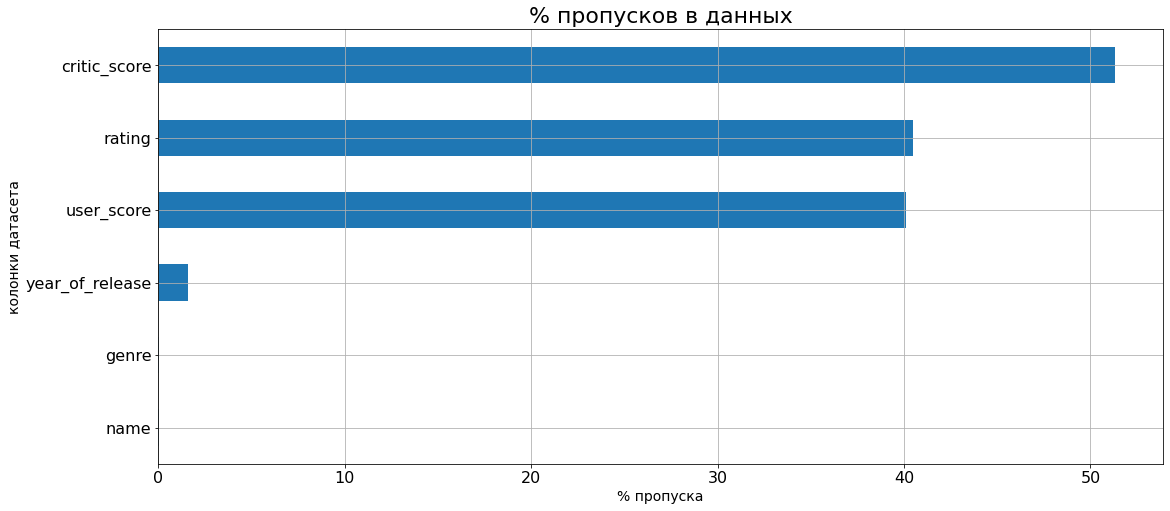

In [10]:
percentage_of_omissions(data)

In [11]:
data.shape[0]

16715

#### Пропуски в `name` и `genre`

Пропуски в жанрах и наименованиях минимальны и не представляют никакой проблемы.

In [12]:
# определяем количество  пропусков
data['name'].isna().sum()

2

In [13]:
# определяем количество  пропусков
data['genre'].isna().sum()

2

In [14]:
data[data['name'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего два пропуска и в тех же самых строках. Удалим эти строки полностью, так как они не несут никакой информации без названия, жанра и оценок, и их количество неприлично мало, чтобы повлиять на какую-либо выборку.

In [15]:
data = data.dropna(subset = ['name','genre'])

In [16]:
# проверяем удаление пропусков 
data['name'].isna().sum()

0

In [17]:
# проверяем удаление пропусков 
data['genre'].isna().sum()

0

In [18]:
# проверяем размер датасета 
data.shape[0]

16713

#### Пропуски в `year_of_release`

In [19]:
data['year_of_release'].isna().sum()

269

In [20]:
data[data['year_of_release'].isna()==True]['name'].unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

В некоторых названиях игр присутсвует год, допускаю, что это год выхода игры.

In [21]:
for i in data[data['year_of_release'].isna()==True].index:
    if data.loc[i,'name'][-4:].isnumeric()==True:
        data.loc[i,'year_of_release'] = data.loc[i,'name'][-4:]
        # print(data.loc[i,'name'][-4:])

In [22]:
data['year_of_release'].isna().sum()

254

Немного, но сохранили несколько позиций. Остальные придется удалять, % невелик.

In [23]:
data = data.dropna(subset=['year_of_release'])

In [24]:
# проверка на удаление пропусков
data['year_of_release'].isna().sum()

0

In [25]:
# проверяем размер датасета 
data.shape[0]

16459

#### Пропуски в `user_score`

In [26]:
data['user_score'].isna().sum()

6609

In [27]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Пропусков много, но заполнять их средней или медианой некорректно, это повлияет на дальнейший анализ. И так как оценка 0 уже присутствует, то для сохранения данных оставим `nan`

In [28]:
# data['user_score'] = data['user_score'].fillna('nan')

In [29]:
# data['user_score'].isna().sum()

Так же в этой колонке присутствует значение `tbd`. Допускаю, что это аббревиатура `To Be Determined`, что означает, что на данный момент для определения значения нехватило данных. Также заменим их на `nan`.

In [30]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = 'nan'

# проверим что верно заменили пропуски
data['user_score'].value_counts()

nan    2378
7.8     322
8       285
8.2     277
8.3     252
       ... 
1.3       2
1.5       2
0.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [31]:
data['user_score'].isna().sum()

6609

#### Пропуски в `rating`

In [32]:
data['rating'].isna().sum()

6681

In [33]:
data['rating'].value_counts()

E       3930
T       2905
M       1536
E10+    1394
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

В этом столбце рейтинг от компании Entertainment Software Rating Board — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». Пропуски заполним значением `unknown`

In [34]:
data['rating'] = data['rating'].fillna('unknown')

#проверяем на пропуски еще раз
data['rating'].isna().sum()

0

#### Пропуски в `critic_score`

In [35]:
data['critic_score'].isna().sum()

8465

In [36]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Пропусков много, но заполнять их средней или медианой некорректно, это повлияет на дальнейший анализ. Для сохранения данных проставим -1, как и в `user_score`

In [37]:
data['critic_score'] = data['critic_score'].fillna(-1)

#проверяем на пропуски еще раз
data['rating'].isna().sum()

0

#### Вывод

In [38]:
#проверяем на пропуски еще раз
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6609
rating                0
dtype: int64

Пропусков не осталось.

### Типы данных

In [39]:
data.dtypes

name                object
platform            object
year_of_release     object
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Необходимо поменять типы данных:
- в `year_of_release` с `float64` на `int` -  год должен быть числом, а не дробным числом, для возможности обработки
- в `user_score` с `object` на `float64` - оценка пользователей должна быть числом, а не текстом, для возможности обработки
- в `critic_score` с `float64` на `int` - значения в столбце целые, можно заменить на int

In [40]:
data['year_of_release'] = data['year_of_release'].astype(int)

In [41]:
data['user_score'] = data['user_score'].astype(float)

In [42]:
data['critic_score'] = data['critic_score'].astype(int)

In [43]:
data.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         int64
user_score         float64
rating              object
dtype: object

Типы данных исправлены.

### Дубликаты

In [44]:
data.duplicated().sum()

0

In [45]:
data[data.duplicated(['name', 'platform', 'year_of_release'])].count()

name               1
platform           1
year_of_release    1
genre              1
na_sales           1
eu_sales           1
jp_sales           1
other_sales        1
critic_score       1
user_score         1
rating             1
dtype: int64

In [46]:
data = data.drop_duplicates(['name', 'platform', 'year_of_release'])
data[data.duplicated(['name', 'platform', 'year_of_release'])].count()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Добавление столбцов

#### Суммарные продажи во всех регионах

In [47]:
data['global_sales'] = data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,NaN,unknown,0.01


### Вывод

Исправили следующее: 
- откорректировали наименования столбцов
- в некоторых столбцах исправили типы данных
- в данных нашли пропуски и заполнили / удалили их
- добавили столбец с суммарными продажами
- избавились от явных дубликатов


## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

In [48]:
data['year_of_release'].describe()

count    16458.000000
mean      2006.484749
std          5.873443
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

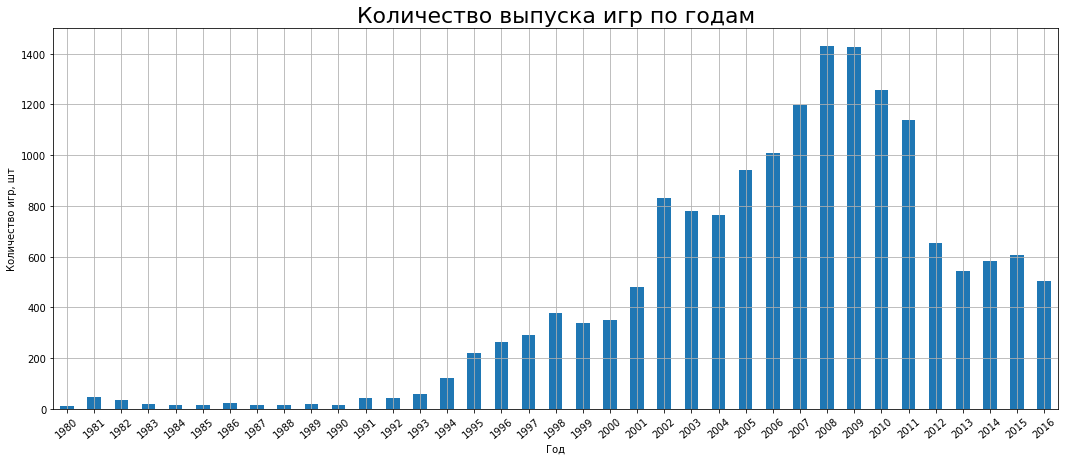

In [49]:
(
    data.groupby('year_of_release')['name'].count()
    .plot(kind='bar' , grid=True, figsize=(18, 7), rot = 40)
)

plt.title('Количество выпуска игр по годам', size = 22)
plt.xlabel('Год', size = 10)
plt.ylabel('Количество игр, шт', size = 10)
plt.show()

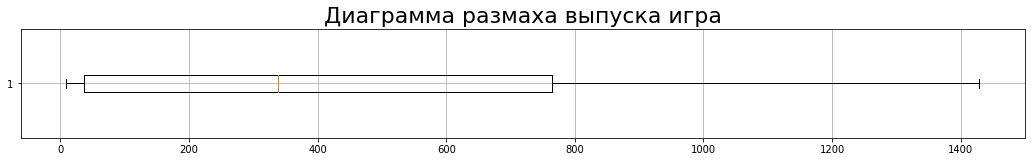

In [50]:
plt.figure(figsize=(18,2))
plt.boxplot(data.groupby('year_of_release')['name'].count(),vert = False)
plt.title('Диаграмма размаха выпуска игра', size=22)
plt.grid(True)
plt.show()

С 1991 года замечается рост выпуска игр по 2009 год, самый пик заметен в 2008-2009 год. Данный рост вероятно связан с началом и развитием игр. Спад с 2009 по 2016 связан с многими факторами, а именно большая конкурентность, уменьшение колличества игр, но улучшение качества игр, компаниии изменили подход к созданию. Явных выбросов не обнаружено.

### Продажи по платформам

In [51]:
data['global_sales'].describe()

count    16458.000000
mean         0.536490
std          1.558879
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: global_sales, dtype: float64

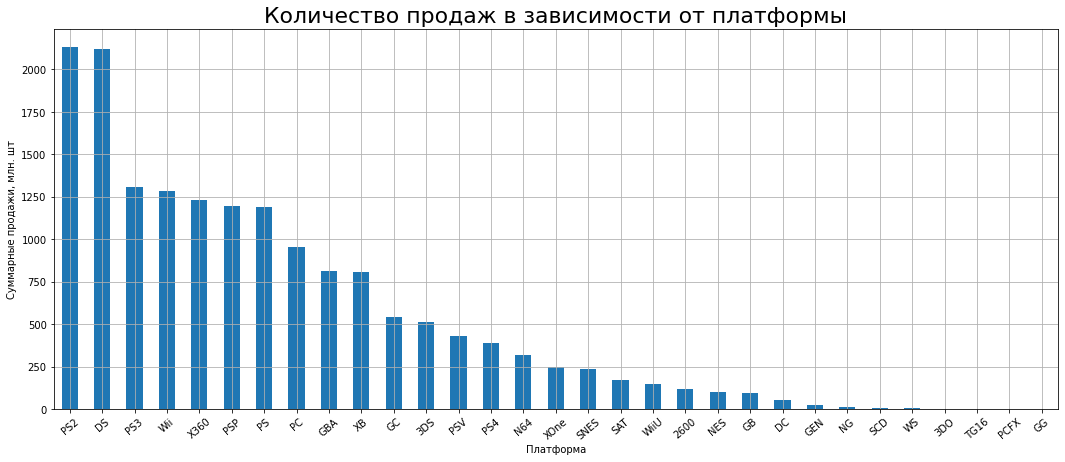

In [52]:
(
    data.groupby('platform')['global_sales'].count()
    .sort_values(ascending=False)
    .plot(kind='bar' , grid=True, figsize=(18, 7), rot = 40)
)
plt.title('Количество продаж в зависимости от платформы', size = 22)
plt.xlabel('Платформа', size = 10)
plt.ylabel('Суммарные продажи, млн. шт', size = 10)
plt.show()

По данному результату замечаем максимальные суммарные продажи. Возьмем ТОП-7

In [54]:
top_7 = (
    data.groupby('platform')['global_sales'].sum()
    .sort_values(ascending=False)
    .head(7)
)
top_7

platform
PS2     1247.28
X360     961.30
PS3      931.33
Wii      891.18
DS       802.79
PS       727.58
PS4      314.14
Name: global_sales, dtype: float64

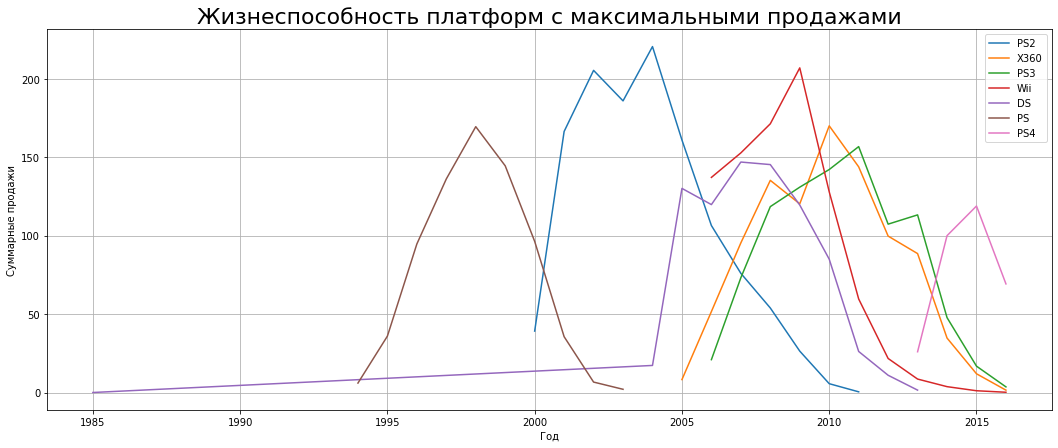

In [55]:
for platform in top_7.index:
    (
        data[data['platform']==platform]
        .groupby('year_of_release')['global_sales'].sum()
        .plot(figsize = (18, 7), label=platform,  grid=True)
    )
    plt.title('Жизнеспособность платформ с максимальными продажами', size=22)
    plt.xlabel('Год', size=10)
    plt.ylabel('Суммарные продажи', size=10)
    plt.legend()

Каждая платформа в среднем живет лет 10, при этом пика достигает в среднем в течении 5 лет, после чего идет спад продаж.
Для дальнейшего анализа возьмем актуальный период в 4 лет: не учитываем данные за период до 2013 года.

### Какие платформы лидируют по продажам, растут или падают?

In [56]:
data_current = data[data['year_of_release']>=2013]
data_current.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


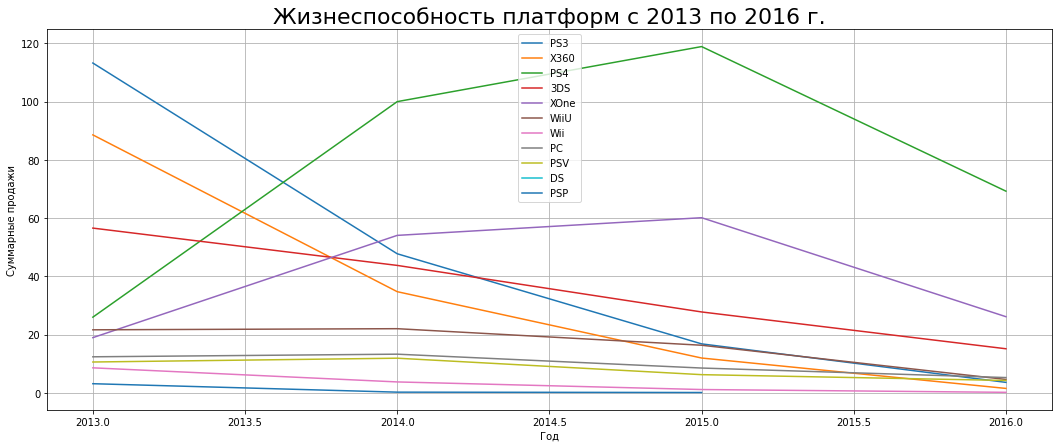

In [57]:
for platform in data_current['platform'].unique():
    (
        data_current[data_current['platform']==platform]
        .groupby('year_of_release')['global_sales'].sum()
        .plot(figsize = (18, 7), label=platform,  grid=True)
    )
    plt.title('Жизнеспособность платформ c 2013 по 2016 г.', size=22)
    plt.xlabel('Год', size=10)
    plt.ylabel('Суммарные продажи', size=10)
    plt.legend()

Наблюдается общая тенденция к спаду, но свежие платформы, такие как PS4 и XOne имели успех, несмотря на общую тенденцию. Потенциальными являются именно они.

### Размах глобальных продажам игр в разбивке по платформам

In [58]:
data_current.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,global_sales
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,1192.000000,2233.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,31.407524,6.584564,0.488442
std,1.089439,0.547730,0.512451,0.233997,0.165693,37.282494,1.610413,1.235226
min,2013.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,5.800000,0.030000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,-1.000000,7.000000,0.110000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,72.000000,7.800000,0.400000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


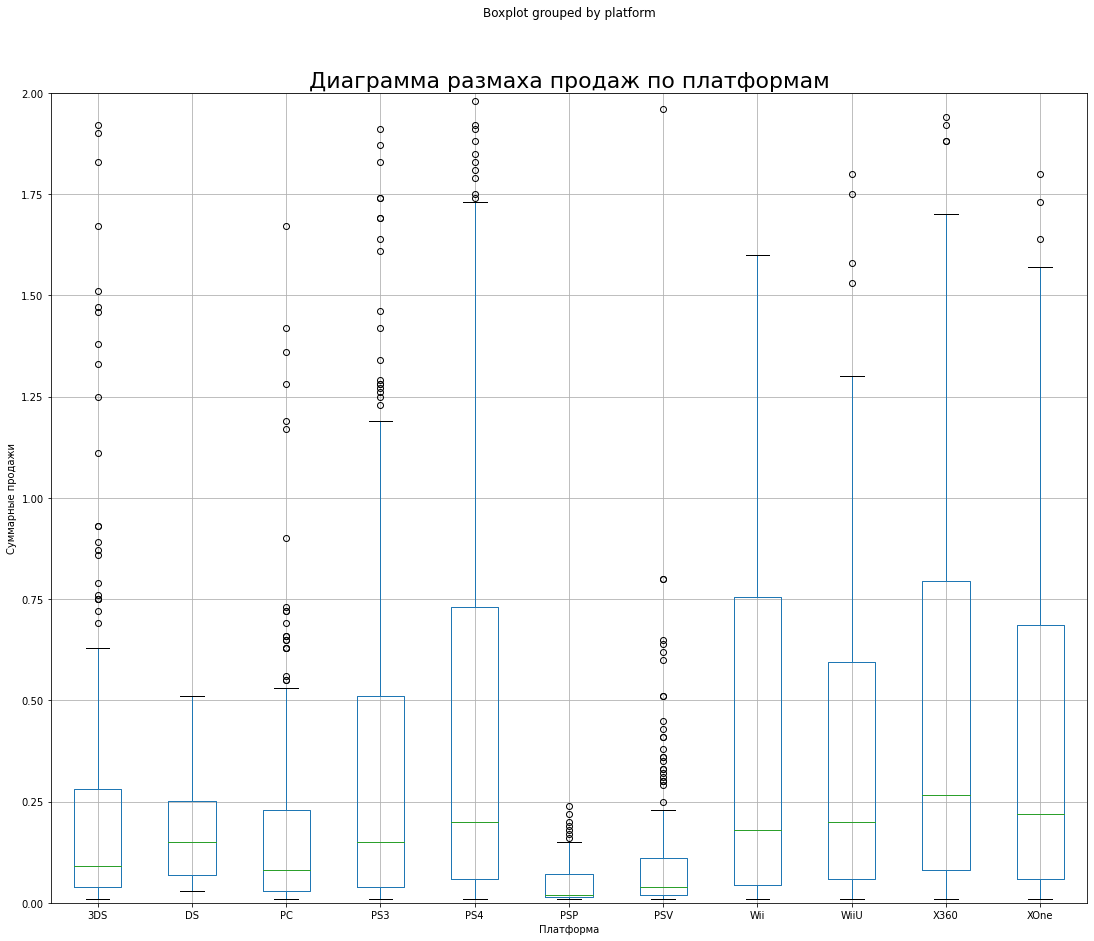

In [59]:
# plt.figure(figsize=(18,7))
data_current.boxplot(by='platform', column='global_sales', figsize=(18,15))
plt.grid(True)
plt.ylim(0, 2)

plt.title('Диаграмма размаха продаж по платформам', size=22)
plt.xlabel('Платформа', size=10)
plt.ylabel('Суммарные продажи', size=10)
plt.show()

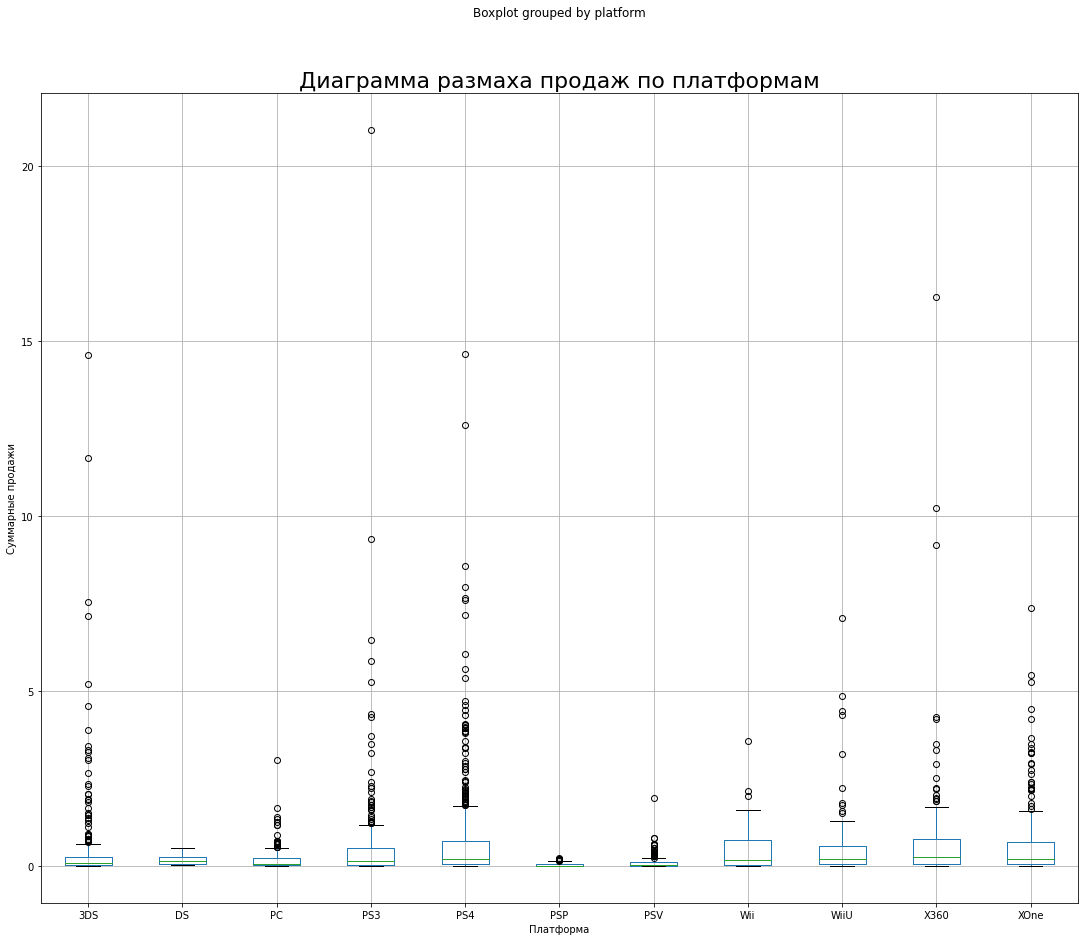

In [60]:
data_current.boxplot(by='platform', column='global_sales', figsize=(18,15))
plt.grid(True)
# <!-- plt.ylim(0, 2) -->

plt.title('Диаграмма размаха продаж по платформам', size=22)
plt.xlabel('Платформа', size=10)
plt.ylabel('Суммарные продажи', size=10)
plt.show()

Все платформы имеют выбросы, платформа X360 имеет максимальный медианный показатель. Платформы PS3, PS4 и XOne имеют близкие значение. Платформа PS4 имеет максимальное значение 3-его квартиля

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?

In [61]:
top_5 = data_current.groupby('platform')['global_sales'].sum().sort_values().tail(5)
top_5.index

Index(['X360', '3DS', 'XOne', 'PS3', 'PS4'], dtype='object', name='platform')

#### Корреляция оценок пользователей и продаж

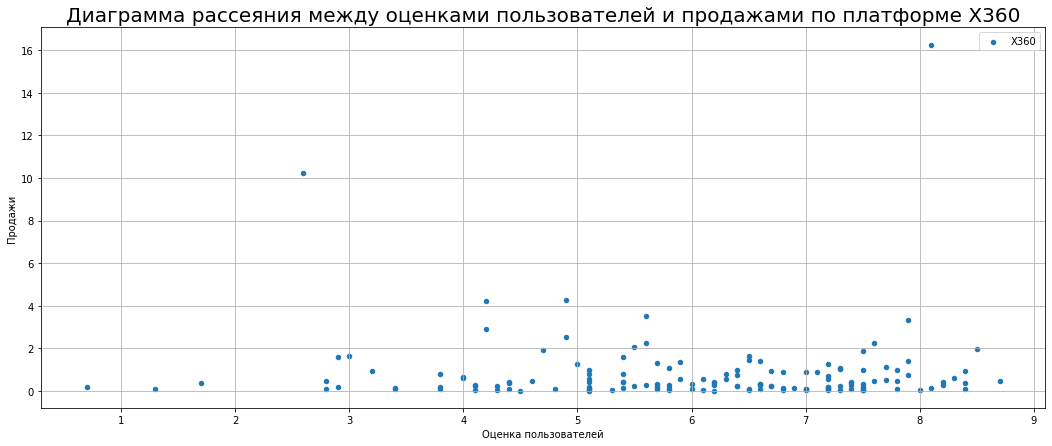

Корреляция между оценками пользователей и продажами по платформе X360  = -0.011742185147181342



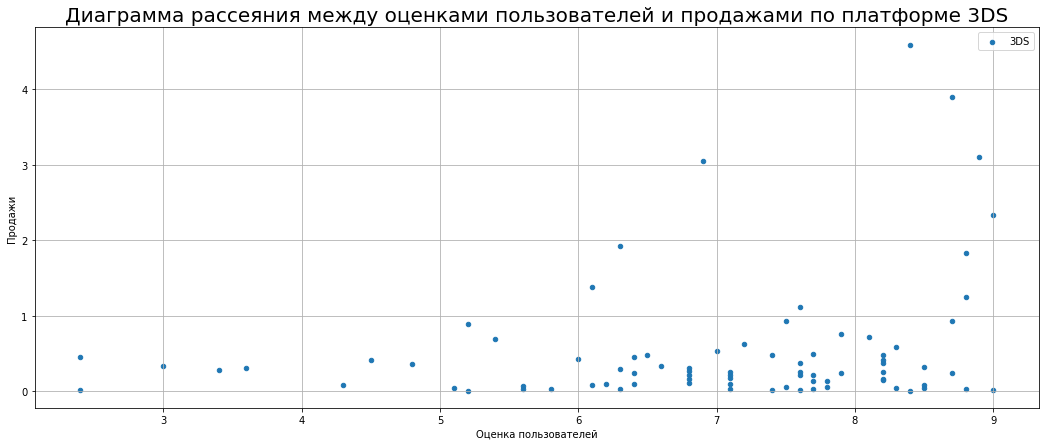

Корреляция между оценками пользователей и продажами по платформе 3DS  = 0.24150411773563016



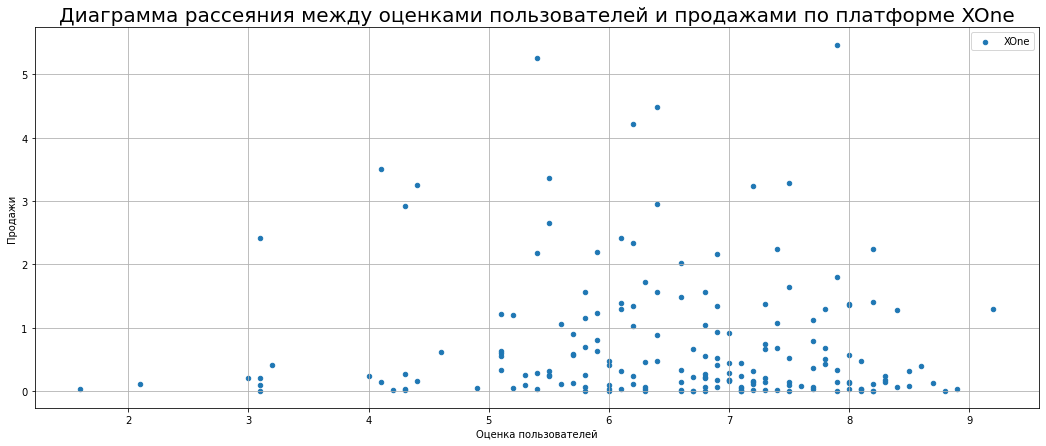

Корреляция между оценками пользователей и продажами по платформе XOne  = -0.06892505328279414



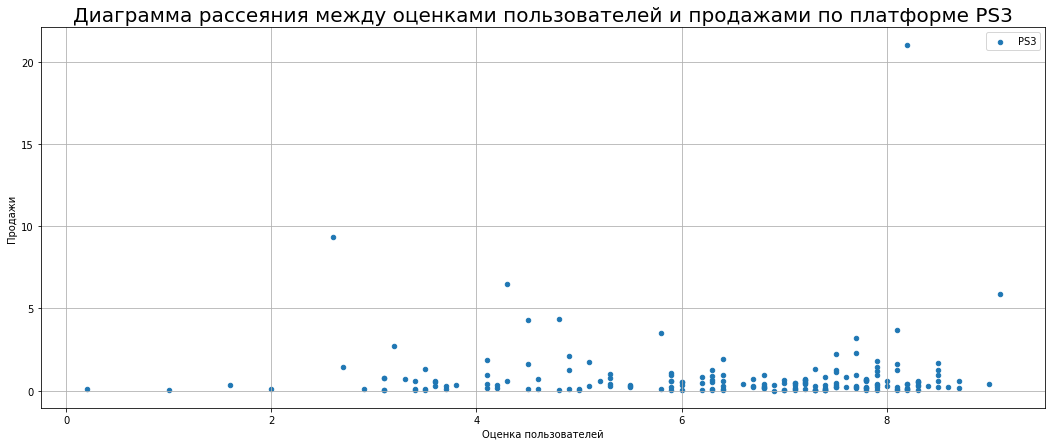

Корреляция между оценками пользователей и продажами по платформе PS3  = 0.0023944027357566925



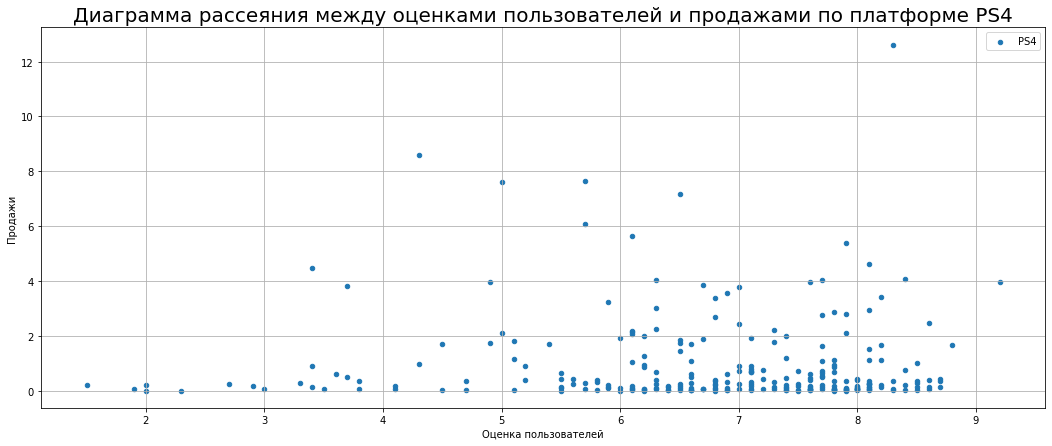

Корреляция между оценками пользователей и продажами по платформе PS4  = -0.031957110204556376



In [62]:
for platform in top_5.index:
    (
    data_current[(data_current['platform']==platform) & (data_current['user_score']>-1)]
        .plot(x='user_score', 
              y='global_sales', 
              kind='scatter', 
              figsize=(18, 7),
           grid =True)
    )
    plt.title(f'Диаграмма рассеяния между оценками пользователей и продажами по платформе {platform}', size = 20)
    plt.xlabel('Оценка пользователей', size = 10)
    plt.ylabel('Продажи', size = 10)
    plt.legend([platform])
    plt.show()
    print(f'''Корреляция между оценками пользователей и продажами по платформе {platform}  =''', 
          (
              data_current[(data_current['platform']==platform) & (data_current['user_score']>-1)]['user_score']
              .corr(data_current[(data_current['platform']==platform) & (data_current['user_score']>-1)]['global_sales'])
          ))
    print()

По полученным данным, сильная зависимость не прослеживается между оценками пользователей и продажами.

#### Корреляция оценок критиков и продаж

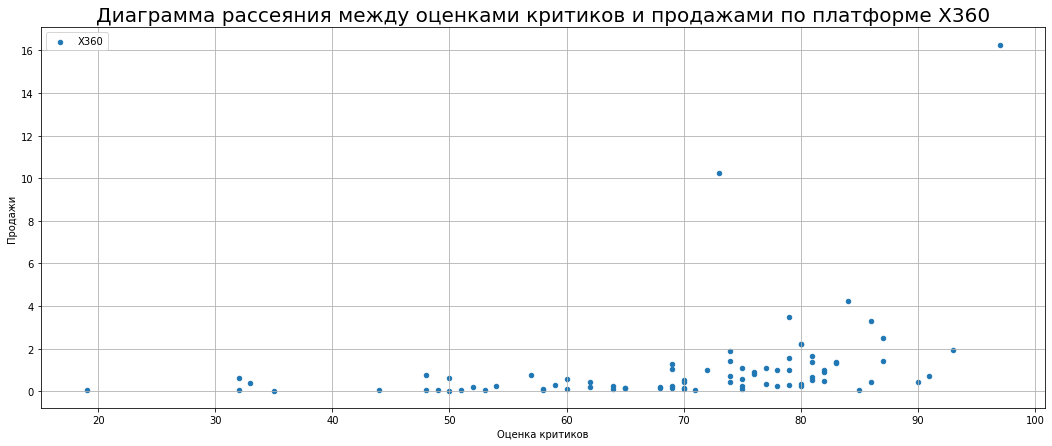

Корреляция между оценками критиков и продажами по платформе X360  = 0.3503445460228664



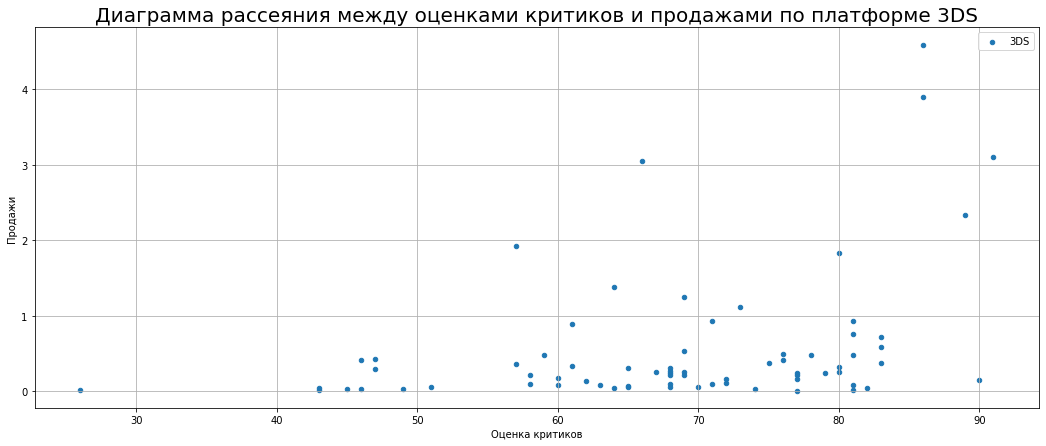

Корреляция между оценками критиков и продажами по платформе 3DS  = 0.3570566142288103



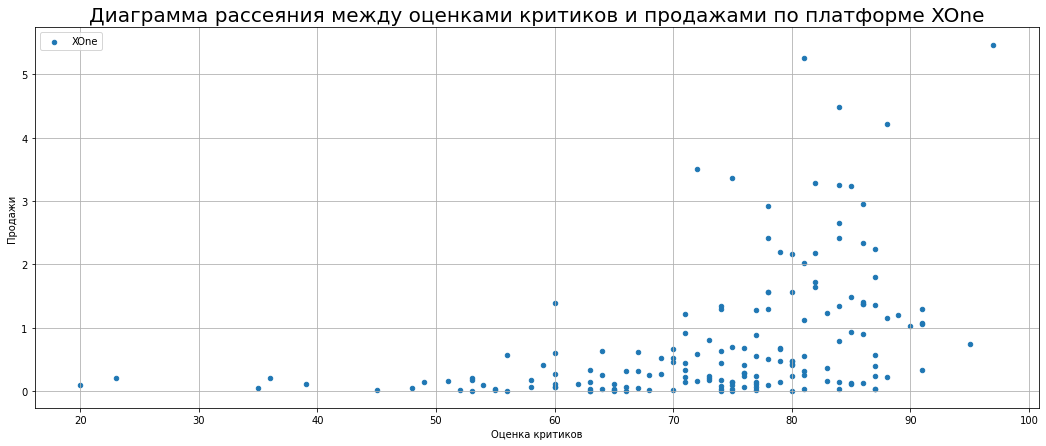

Корреляция между оценками критиков и продажами по платформе XOne  = 0.4169983280084017



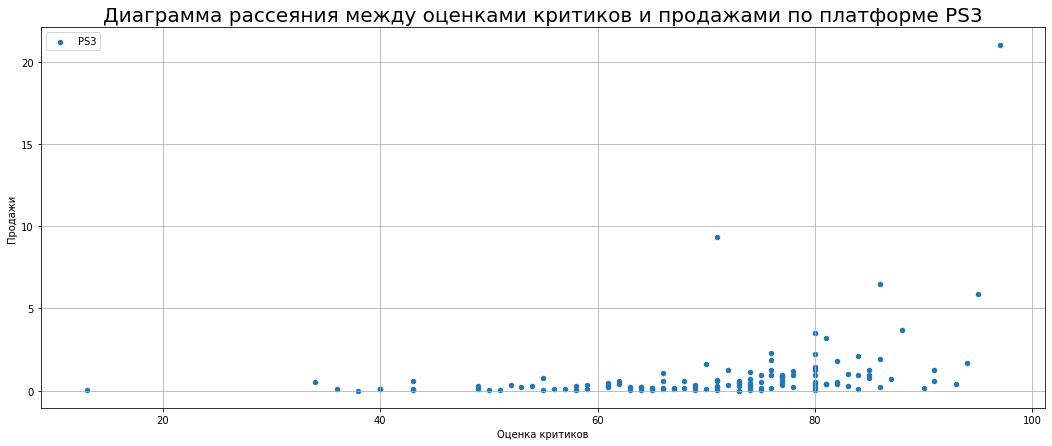

Корреляция между оценками критиков и продажами по платформе PS3  = 0.3342853393371919



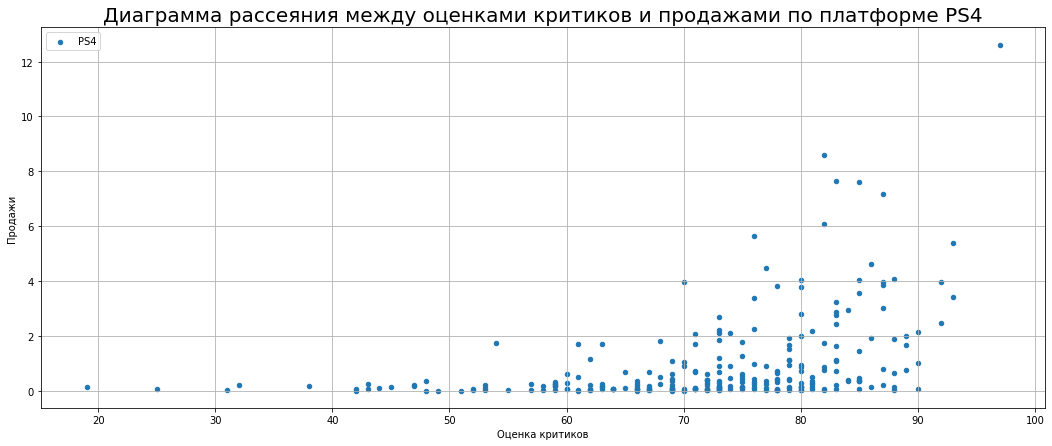

Корреляция между оценками критиков и продажами по платформе PS4  = 0.40656790206178095



In [63]:
for platform in top_5.index:
    (
    data_current[(data_current['platform']==platform) & (data_current['critic_score']>-1)]
        .plot(x='critic_score', 
              y='global_sales', 
              kind='scatter', 
              figsize=(18, 7),
           grid =True)
    )
    plt.title(f'Диаграмма рассеяния между оценками критиков и продажами по платформе {platform}', size = 20)
    plt.xlabel('Оценка критиков', size = 10)
    plt.ylabel('Продажи', size = 10)
    plt.legend([platform])
    plt.show()
    print(f'''Корреляция между оценками критиков и продажами по платформе {platform}  =''', 
          (
              data_current[(data_current['platform']==platform) & (data_current['critic_score']>-1)]['critic_score']
              .corr(data_current[(data_current['platform']==platform) & (data_current['critic_score']>-1)]['global_sales'])
          ))
    print()

По полученным данным, делаем выводы, что сильной зависимости нет, но оценки критиков учитывают в большей степени, чем оценки пользователей.

#### Корреляция общих оценок критиков и продаж

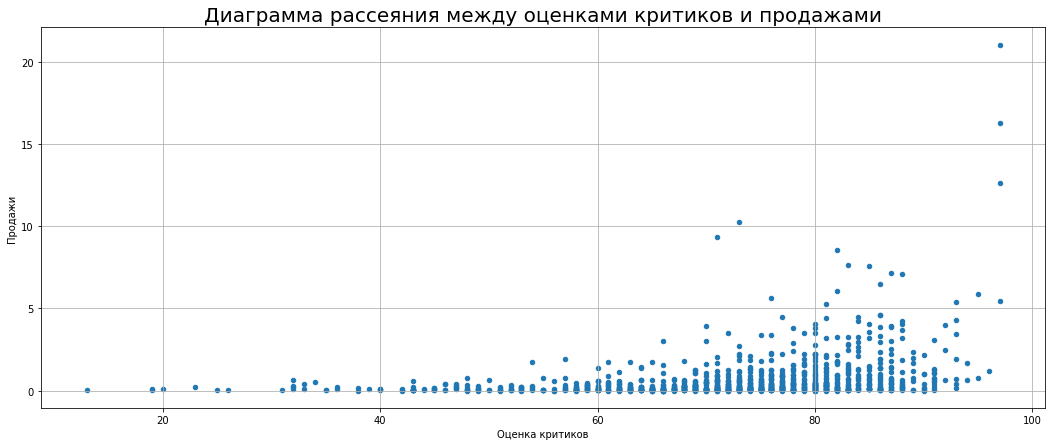

Корреляция между оценками критиков и продажами 0.40656790206178095



In [64]:
(
data_current[data_current['critic_score']>-1]
    .plot(x='critic_score', 
          y='global_sales', 
          kind='scatter', 
          figsize=(18, 7),
       grid =True)
)
plt.title(f'Диаграмма рассеяния между оценками критиков и продажами', size = 20)
plt.xlabel('Оценка критиков', size = 10)
plt.ylabel('Продажи', size = 10)
plt.show()
print(f'Корреляция между оценками критиков и продажами', 
      (
          data_current[(data_current['platform']==platform) & (data_current['critic_score']>-1)]['critic_score']
          .corr(data_current[(data_current['platform']==platform) & (data_current['critic_score']>-1)]['global_sales'])
      ))
print()

В общих показателях делаем вывод, что к мнению критиков прислушиваются больше.

### Вывод по корреляции отзывов

У выбранных 5-ти платформ прослеживается слабая зависимость между оценками и продажами, но в случае с PS3 и X360, показатель близок к корреляции между оценки критиков и продаж, а PS4 и XOne противоположная картина.

И так же можно судить, что к мнению критиков прислушиваются больше, чем к отзывам пользователей.

### Общее распределение игр по жанрам

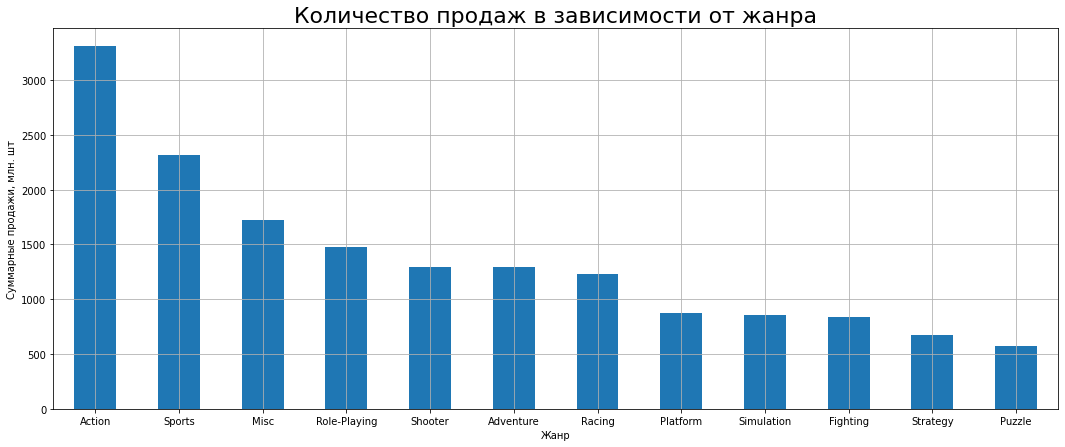

In [65]:
(
    data.groupby('genre')['global_sales'].count()
    .sort_values(ascending=False)
    .plot(kind='bar' , grid=True, figsize=(18, 7), rot = 0)
)
plt.title('Количество продаж в зависимости от жанра', size = 22)
plt.xlabel('Жанр', size = 10)
plt.ylabel('Суммарные продажи, млн. шт', size = 10)
plt.show()

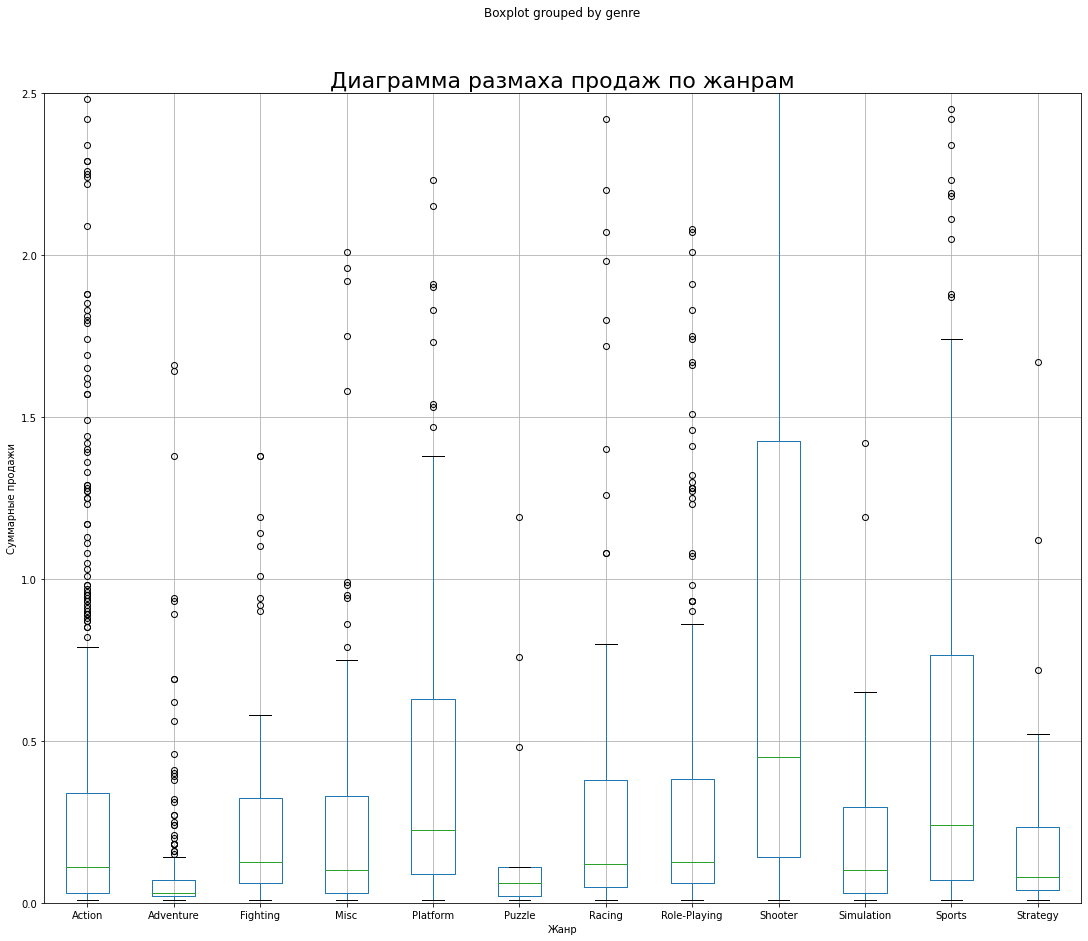

In [66]:
data_current.boxplot(by='genre', column='global_sales', figsize=(18,15))
plt.grid(True)
plt.ylim(0, 2.5)

plt.title('Диаграмма размаха продаж по жанрам', size=22)
plt.xlabel('Жанр', size=10)
plt.ylabel('Суммарные продажи', size=10)
plt.show()

In [67]:
data_current.groupby('genre')['global_sales'].mean().sort_values(ascending=False)

genre
Shooter         1.245882
Sports          0.703972
Platform        0.576081
Role-Playing    0.499623
Racing          0.469294
Fighting        0.441375
Action          0.420196
Misc            0.405290
Simulation      0.350968
Puzzle          0.186471
Strategy        0.180000
Adventure       0.096490
Name: global_sales, dtype: float64

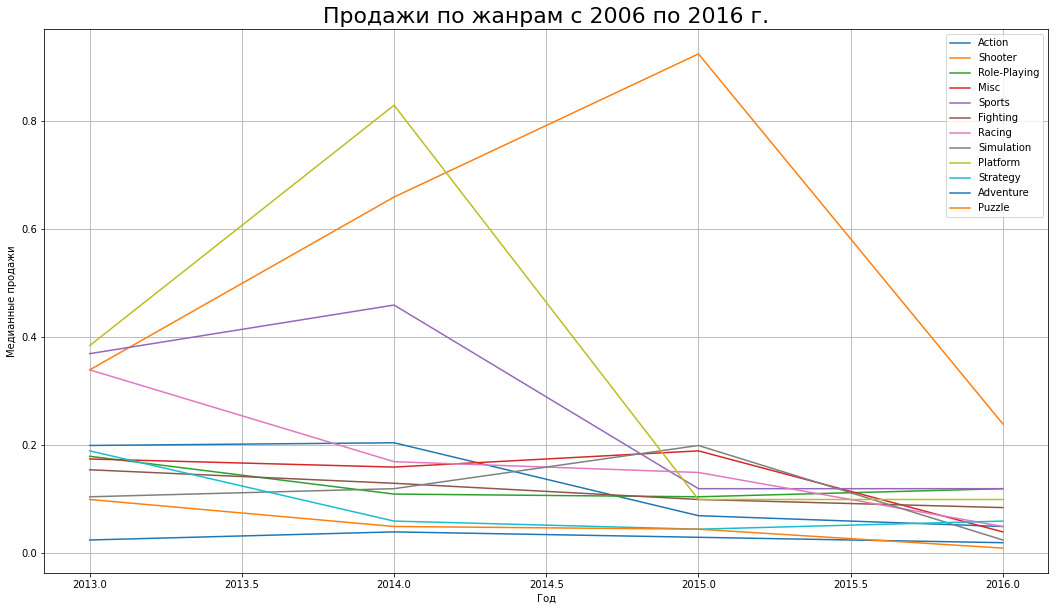

In [68]:
for genre in data_current['genre'].unique():
    (
    data_current[data_current['genre']==genre].groupby('year_of_release')['global_sales'].median()
        .plot(figsize = (18, 10), label=genre,  grid=True)
    )
    plt.title('Продажи по жанрам c 2006 по 2016 г.', size=22)
    plt.xlabel('Год', size=10)
    plt.ylabel('Медианные продажи', size=10)
    plt.legend()
    # plt.show()

За период с 2006 по 2016 годы топ по продажам выходят такие жанры, как `Action`, `Sports`, `Misc`. 
Для прогнозирования на ближайший год лучше оставить `Shooter`, `Sports` и `Platform` так как они на протяжении 10 лет продаются стабильнее, чем остальные жанры.

### Вывод

С 1991 по 2009 год наблюдался рост числа выпускаемых игр, достигнув пика в 2008–2009 годах, что, вероятно, связано с развитием игровой индустрии. Компании изменили подход к разработке, что повлияло на рынок.

Средний срок жизни игровых платформ составляет около 10 лет, при этом пик популярности приходится на первые 5 лет, после чего продажи начинают снижаться.

Несмотря на общий спад после 2009 г. в индустрии, новые платформы (PS4 и XOne) показали высокие результаты, что делает их перспективными для изучения. Среди рассмотренных платформ X360 демонстрирует наивысший медианный уровень продаж, в то время как PS3, PS4 и XOne имеют схожие показатели. 

Прямой зависимости между оценками пользователей и продажами не обнаружено, однако оценки критиков оказывают большее влияние.
Для PS3 и X360 наблюдается умеренная корреляция между оценками критиков и продажами, тогда как у PS4 и XOne эта связь слабее.

В период 2006–2016 гг. лидерами по продажам стали жанры Action, Sports и Misc. Для прогнозирования на ближайший год наиболее стабильными и перспективными можно считать Shooter, Sports и Platform, так как они демонстрируют спрос более устойчивый на протяжении 10 лет.

Таким образом, при планировании стратегии разработки и выпуска игр стоит учитывать **влияние оценок критиков**, **успех новых платформ** и **стабильный спрос на определенные жанры**.

## Портрет пользователя каждого региона

In [69]:
def pie(data, parametr):
    regions = data.columns[4:7]

    for r in range(len(regions)):
        pylab.subplot(3, 3, r+1)
        if parametr == 'platform':
            plt.suptitle('ТОП-5 платформ в регионах', size=22)
            data_top_5 = (
                data.groupby(parametr)[regions[r]].sum()
                .sort_values(ascending = False)
                .head(5)
                .plot(kind="pie", autopct='%1.1f%%', figsize=(15,15))
            )
        elif parametr == 'genre':
            plt.suptitle('ТОП-5 жанров в регионах', size=22)
            data_top_5 = (
                data.groupby(parametr)[regions[r]].sum()
                .sort_values(ascending = False)
                .head(5)
                .plot(kind="pie", autopct='%1.1f%%', figsize=(15,15))
            )
        elif parametr == 'rating':            
            plt.suptitle('ТОП-5 с высоким рейтингом ESRB в регионах', size=22)
            data_top_5 = (
                data.groupby(parametr)[regions[r]].sum()
                .sort_values(ascending = False)
                .head(5)
                .plot(kind="pie", autopct='%1.1f%%', figsize=(15,15))
            )
        plt.title(regions[r][:2].upper(), size=18)
        plt.ylabel('')
    plt.show()

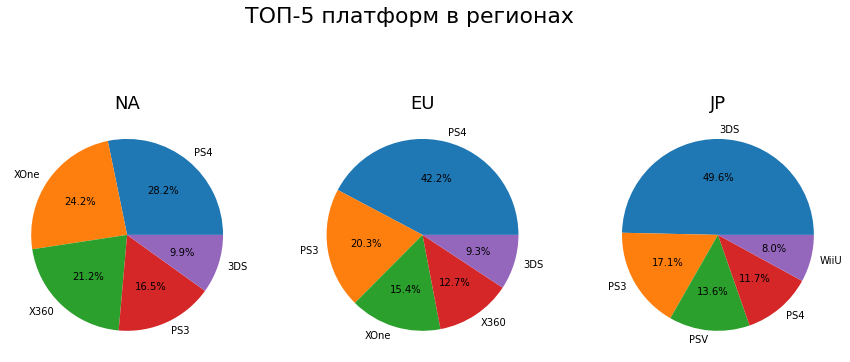

In [70]:
pie(data_current, 'platform')

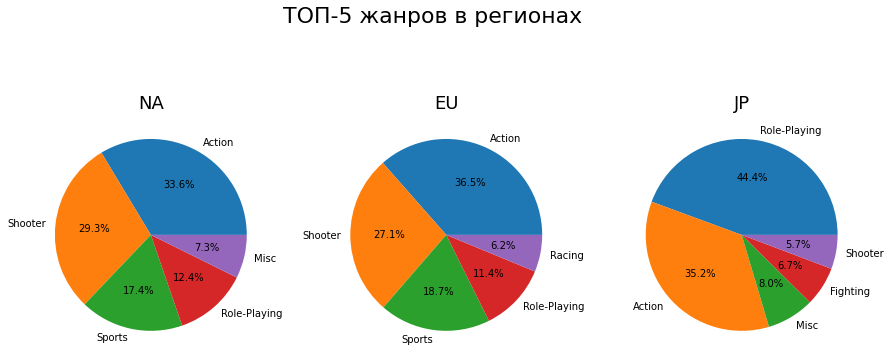

In [71]:
pie(data_current, 'genre')

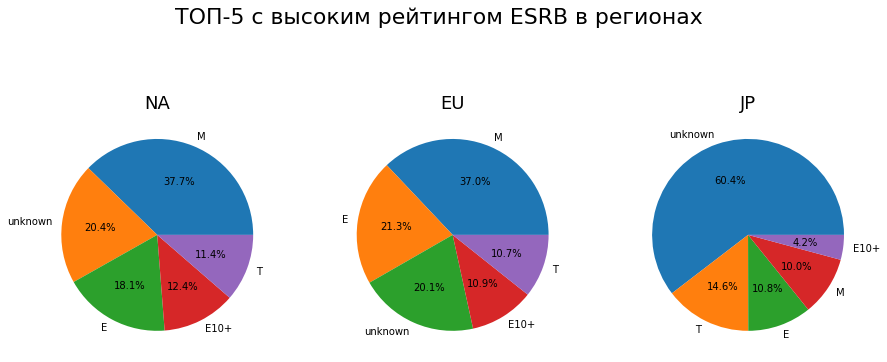

In [72]:
pie(data_current, 'rating')

### Вывод

В Северной Америке топ-1 занимает платформа PS4, Европе - PS4, а в Японии - 3DS. 

В Северной Америке и в Европе популярность имеют игры жанра Action, на втором месте Schooter, на третьем Sports.
В Японии иная картина,на первом месте находится - жанр Role-Playing, Action на втором, а жанр Shooter - на 5 месте. Но на третьем месте - Misc.

Разница влияния рейтинга на продажи прослеживается только между западом и востоком, если в Северной Америке и Европе первое место занимает категория M, то в Японии неизвестный рейтинг занимает первое место, а второе и третье - T и E, соответсвенно.

Портрет пользователя Северной Америки и Европы совпадают, выбирают платформы PS3, XOne, жанры Action, Schooter, Sports и c категорией рейтинга М. Но в Японии портрет отличается, пользователи выбирают 3DS, жанр Role-Playing, Action в категории Е и Т, но с большим колличеством неопределенного рейтингом. Это следует учитывать при разработке РК.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Задание удовлетворяет условиям для составления нулевой гипотезы, то есть сравнимаемые величины равны.

Альтернативная гипотеза может быть проверена тремя вариантами "меньше", "не равно", "больше" в первом необходимо проверить вопрос про равенство, следовательно проверку надо провести двухстороннюю alternative='two-sided'.

Дисперсии выборок явно не равны, следовательно следует применить параметр equal_var = False, учитывая критерий Уэлча

**Н_0: Средние пользовательские рейтинги платформ XOne и PC равны**  
**Н_1: Средние пользовательские рейтинги платформ XOne и PC не равны**  

Для проверки гипотезы необходимо установить уровень значимости для того или иного сравнения, обычно его выбирают из размерного ряда 1-10 %, в зависимости от изученности и требовательности к данным. Обычно его устанавливают в среднем значении 0,05.

**alpha = 0.05**



In [73]:
xone = data_current[(data_current['platform'] == "XOne") & (data_current['user_score'] >-1)]
pc = data_current[(data_current['platform'] == "PC") & (data_current['user_score'] >-1)]

results = st.ttest_ind(xone['user_score'],
                       pc['user_score'],
                       equal_var=False,
                       alternative = 'two-sided')

# alpha = 0.01
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.14759594013430463
Не удалось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергнута, можно предположить, что что XOne и PC равны, при alpha=0.05

### Средние пользовательские рейтинги жанров `Action` и `Sports` разные.

Задание не удовлетворяет условиям для составления нулевой гипотезы(сравнимаемые параметры равны), то есть сравнимаемые величины не равны. Для решения мы перевернули условия, а именно, если мы отвергнем нулевую гипотезу, значит подтвердим, что рейтинги разные.

Альтернативная гипотеза может быть проверена тремя вариантами "меньше", "не равно", "больше" в первом необходимо проверить вопрос про равенство, следовательно проверку надо провести двухстороннюю alternative='two-sided'.

Дисперсии выборок явно не равны, следовательно следует применить параметр equal_var = False, учитывая критерий Уэлча

**Н_0: Средние пользовательские рейтинги жанров Action и Sports равны**  
**Н_1: Средние пользовательские рейтинги жанров Action и Sports не равны**  

Для проверки гипотезы необходимо установить уровень значимости для того или иного сравнения, обычно его выбирают из размерного ряда 1-10 %, в зависимости от изученности и требовательности к данным. Обычно его устанавливают в среднем значении 0,05.

**alpha = 0.05**

In [74]:
action = data_current[(data_current['genre'] == "Action") & (data_current['user_score'] >-1)]
sports = data_current[(data_current['genre'] == "Sports") & (data_current['user_score'] >-1)]

results = st.ttest_ind(action['user_score'],
                       sports['user_score'],
                       equal_var=False,
                       alternative = 'two-sided')

# alpha = 0.01
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.4460039700704315e-20
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, следовательно, есть основания предположить, что Action и Sports не равны, при alpha=0.05

## Общий вывод

<!-- Загрузка данных и общая информация показала:

некорректные наименования столбцов
в некоторых столбцах некорректные типы данных
в данных присутствуют пропуски
отсутсвует колонка с суммарными продажами
необходима проверка на дубликаты

На этапе предобработки сделали:

откорректировали наименования столбцов
в некоторых столбцах исправили типы данных
в данных нашли пропуски и заполнили / удалили их
добавили столбец с суммарными продажами
избавились от явных дубликатов

Исследовательский анализ показа:

С 1991 по 2009 год наблюдался рост числа выпускаемых игр, достигнув пика в 2008–2009 годах, что, вероятно, связано с развитием игровой индустрии. Компании изменили подход к разработке, что повлияло на рынок.
Средний срок жизни игровых платформ составляет около 10 лет, при этом пик популярности приходится на первые 5 лет, после чего продажи начинают снижаться.
Несмотря на общий спад после 2009 г. в индустрии, новые платформы (PS4 и XOne) показали высокие результаты, что делает их перспективными для изучения. Среди рассмотренных платформ X360 демонстрирует наивысший медианный уровень продаж, в то время как PS3, PS4 и XOne имеют схожие показатели.
Прямой зависимости между оценками пользователей и продажами не обнаружено, однако оценки критиков оказывают большее влияние. Для PS3 и X360 наблюдается умеренная корреляция между оценками критиков и продажами, тогда как у PS4 и XOne эта связь слабее.
В период 2006–2016 гг. лидерами по продажам стали жанры Action, Sports и Misc. Для прогнозирования на ближайший год наиболее стабильными и перспективными можно считать Shooter, Sports и Platform, так как они демонстрируют спрос более устойчивый на протяжении 10 лет.
Таким образом, при планировании стратегии разработки и выпуска игр стоит учитывать влияние оценок критиков, успех новых платформ и стабильный спрос на определенные жанры.

Портрет пользователя каждого региона:
В Северной Америке топ-1 занимает платформа X360, Европе - PS3, а в Японии - DS.
В Северной Америке и в Европе популярность имеют игры жанра Action, на втором месте Sports, на третьем Schooter. В Японии иная картина,на первом месте находится - жанр Role-Playing, Action на втором, а жанр Shooter - даже не присутсвует в топ-5. Но на третьем месте - Misc.
Разница влияния рейтинга на продажи прослеживается только между западом и востоком, если в Северной Америке и Европе первое место занимает категория Е, то в Японии неизвестный рейтинг занимает первое место, а второе и третье - Е и Т, соответсвенно.
Портрет пользователя Северной Америки и Европы совпадают, выбирают платформы Wii, PS3, X360, жанры Action, Sports, Schooter и c категорией рейтинга М и Е. Но в Японии портрет отличается, пользователи выбирают DS, жанр Role-Playing, Action в категории Е и Т, но с большим колличеством неопределенного рейтингом. Это следует учитывать при разработке РК.

Проверка гипотез:
Нулевая гипотеза отвергнута, следовательно, XOne и PC не равны.
Нулевая гипотеза отвергнута, следовательно, Action и Sports не равны. -->

На начальном этапе были выявлены и исправлены следующие проблемы в данных:

- Некорректные названия столбцов (обработаны)
- Ошибочные типы данных (исправлены)
- Отсутствие столбца с суммарными продажами (добавлен)
- Наличие дубликатов (удалены)
- Пропущенные значения (часть заполнена, часть удалена)
    - Проведён поиск по пропущенным значениям 'tbd'(оценки для Северной Америки) и пропуску в столбце rating и провели обработку. В исключительных местах пропуски заменили на nan, чтобы не исказить статистику.

**Исследовательский анализ показал:**  

Рост выпуска игр наблюдался с 1991 по 2009 год с пиком в 2008-2009 гг., что связано с развитием индустрии.
После 2009 года начался спад, вызванный ужесточением конкуренции и смещением акцента на качество. Средний срок жизни платформы - около 10 лет с пиком популярности на 5-й год. PS4 и XOne показали лучшие результаты несмотря на общий спад. Критики влияют на продажи сильнее, чем пользовательские оценки. Наибольшая корреляция между оценками критиков и продажами наблюдается у PS3 и X360.

Лидеры продаж (2013-2016): Action, Sports, Misc.  
Наиболее стабильные жанры: Shooter, Sports, Platform.  

Региональные особенности:  
Северная Америка: лидер - PS4, жанры Action/Shooter/Sports, рейтинг M  
Европа: лидер - PS4, аналогичные NA предпочтения  
Япония: лидер - 3DS, жанры Role-Playing/Action, рейтинги T/E и много неизвестных  


Средние пользовательские рейтинги платформ XOne и PC равны.  
Средние пользовательские рейтинги жанров Action и Sports различаются.  

**Рекомендации:** 
- При разработке игр уделять особое внимание мнению критиков.  
- Для глобальных проектов ориентироваться на жанры Action/Sports, для японского рынка - Role-Playing.  
- Учитывать региональные различия в платформах и рейтингах при маркетинге.  
- Инвестировать в разработку для перспективных платформ (PS4/3DS).

Оптимальная стратегия для рекламных кампаний: региональный подход (разные жанры/платформы) + акцент на критиков + фокус на проверенные жанры. Для глобальных проектов — комбинация Action (Запад) и Role-Playing (Япония).